<a href="https://colab.research.google.com/github/FunNyLuAz/Modelagem-de-Fenomenos-Fisicos/blob/main/Atividade%20Pr%C3%A1tica%20Em%20Grupo%20RA3%20-%202023-1/Atividade%20Pr%C3%A1tica%20Em%20Grupo%20RA3%20-%202023-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as pyplot
import numpy as np
import sympy as sp
import scipy.interpolate as interp

# Questão 1
1. **Análise de Sinais Sonoros**

   Um microfone registra um sinal sonoro cuja intensidade $I(t)$ varia com o tempo de acordo com a função $I(t) = 20\sin(t) + 50$. O tempo $t$ está em segundos. Determine a intensidade sonora total registrada pelo microfone em um intervalo de 10 segundos.

2. **Aceleração de uma Nave Espacial**

   Uma nave espacial está acelerando de acordo com a seguinte função de aceleração: $a(t) = 10\cos(t) + 30$ m/s², onde $t$ é o tempo em segundos. Determine a mudança total na velocidade da nave nos primeiros 5 segundos.

3. **Cálculo do Consumo de Energia**

   Um servidor de um data center consome energia de acordo com a função $E(t) = 200 + 100\sin(t)$, onde $E$ é a energia em watts e $t$ é o tempo em horas. Calcule o total de energia consumida pelo servidor em 24 horas.

4. **Volume de Líquido em um Reservatório**

   A taxa de fluxo de água entrando em um reservatório em litros por segundo é dada pela função $f(t) = 100 + 20\sin(t)$, onde $t$ é o tempo em segundos. Calcule o total de água que entrou no reservatório nos primeiros 60 segundos.


## Soluções

In [2]:
t = sp.Symbol("t")
i = 20*sp.sin(t) + 50

sp.integrate(i, (t, 0, 10)).evalf()

536.781430581529

In [3]:
t = sp.Symbol("t")
a = 10*sp.cos(t) + 30

sp.integrate(a, (t, 0, 5)).evalf()

140.410757253369

In [4]:
t = sp.Symbol("t")
E = 200 + 100*sp.sin(t)

sp.integrate(E, (t, 0, 24)).evalf()

4857.58209926630

In [5]:
t = sp.Symbol("t")
f = 100 + 20*sp.sin(t)

sp.integrate(f, (t, 0, 60)).evalf()

6039.04825960830

# Questão 2
Um veículo autônomo está sendo testado em um circuito fechado. Durante o teste, o veículo registra a sua velocidade em cinco momentos distintos, conforme apresentado na tabela abaixo:

| Tempo (s) | Velocidade (m/s) |
|-----------|------------------|
| 0         | 0                |
| 1         | 3                |
| 2         | 4                |
| 3         | 2                |
| 4         | 0                |

Suponha que a função de velocidade $v(t)$ do veículo possa ser representada por um polinômio $P(t)$ que passa por todos os cinco pontos. O método de Lagrange é uma técnica para encontrar esse polinômio, e pode ser aplicado utilizando a biblioteca `scipy` do Python. Trace os gráficos da velocidade, aceleração e posição em relação ao tempo e marque estes três valores com uma linha vertical em $t=5$s.

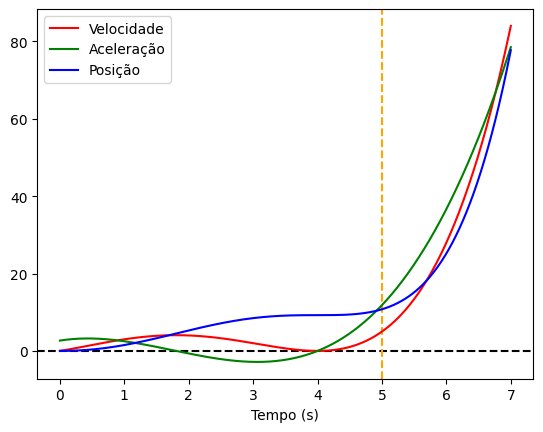

In [6]:
t = sp.Symbol("t")
v = sp.Poly(interp.lagrange([0, 1, 2, 3, 4], [0, 3, 4, 2, 0]).coeffs, t).as_expr()
a = sp.diff(v)
s = sp.integrate(v)

min_t = 0
max_t = 7

t_mark = 5

# Calcula os valores das funções
vals_t = np.linspace(min_t, max_t, 500)
vals_v = np.array([v.subs(t, i) for i in vals_t], dtype=float)
vals_a = np.array([a.subs(t, i) for i in vals_t], dtype=float)
vals_s = np.array([s.subs(t, i) for i in vals_t], dtype=float)

# Gráfico
#pyplot.gca().set_aspect('equal', 'datalim')
pyplot.xlabel("Tempo (s)")
pyplot.axhline(y=0, linestyle="--", color="black")
pyplot.axvline(x=t_mark, linestyle="--", color="orange")

pyplot.plot(vals_t, vals_v, color="red", label="Velocidade")
pyplot.plot(vals_t, vals_a, color="green", label="Aceleração")
pyplot.plot(vals_t, vals_s, color="blue", label="Posição")

# Mostra resultados
pyplot.legend()
pyplot.show()

Um engenheiro está projetando uma barragem de concreto com a forma de um trapézio retângulo. O projeto do perfil da barragem, olhando de lado, é dado pela função $f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$, onde $x$ é a altura acima da base (em metros), $a$ é a altura mínima da barragem (em metros), e $b$ é a amplitude da variação do perfil (em metros). Por razões de segurança, o perfil da barragem varia sinusoidalmente de $a$ até $a + b$ ao longo da altura.

O engenheiro precisa calcular o volume de concreto necessário para construir a barragem. Ele sabe que o comprimento da barragem é de $L$ metros e que o perfil é o mesmo em todo o seu comprimento.

Ele decide então modelar o volume de concreto necessário como a integral da função $f(x)$, de $0$ até a altura máxima $H$, multiplicada pelo comprimento $L$.

Dadas as seguintes informações:

- $a = 10$ metros
- $b = 5$ metros
- $H = 20$ metros
- $L = 100$ metros

Calcule o volume de concreto necessário para a construção da barragem e trace o gráfico da função que descreve o perfil da barragem e sombreie a área sob a curva que representa o volume de concreto.



Solução: (200/pi + 1000) -> ~1063.66197723676



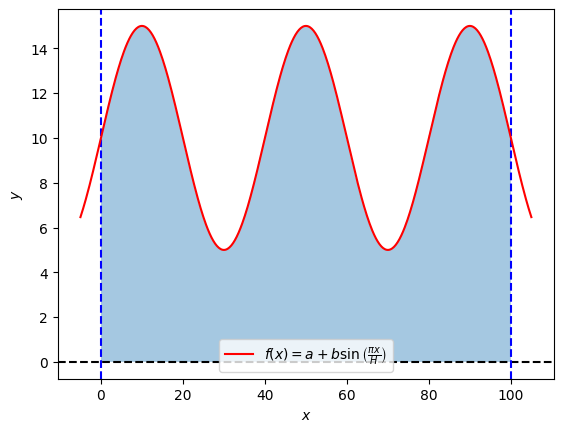

In [7]:
a = 10
b = 5
H = 20
L = 100

x = sp.Symbol("x")
f = a + b * sp.sin(sp.pi*x/H)

min_x = 0
max_x = L
x_lim = 5

# Calcula os valores das funções
vals_x = np.linspace(min_x - x_lim, max_x + x_lim, 500)
vals_f = np.array([f.subs(x, i) for i in vals_x], dtype=float)
vals_x_i = np.linspace(min_x, max_x, 500)
vals_f_i = np.array([f.subs(x, i) for i in vals_x_i], dtype=float)

# Gráfico
#pyplot.gca().set_aspect('equal', 'datalim')
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.axhline(y=0, linestyle="--", color="black")
pyplot.axvline(x=0, linestyle="--", color="blue")
pyplot.axvline(x=L, linestyle="--", color="blue")

pyplot.plot(vals_x, vals_f, color="red", label=r"$f(x) = a + b\sin\left(\frac{\pi x}{H}\right)$")
pyplot.fill_between(vals_x_i, vals_f_i, step="pre", alpha=0.4)

# Mostra resultados
area = sp.integrate(f, (x, 0, L))
print(f"Solução: ({area}) -> ~{area.evalf()}\n")
pyplot.legend()
pyplot.show()